In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read datasets
df_class = pd.read_csv("classData.csv")

# Fault Classification

In [ ]:
df_class

G  C  B  A          Ia          Ib          Ic        Va        Vb  \
0     1  0  0  1 -151.291812   -9.677452   85.800162  0.400750 -0.132935   
1     1  0  0  1 -336.186183  -76.283262   18.328897  0.312732 -0.123633   
2     1  0  0  1 -502.891583 -174.648023  -80.924663  0.265728 -0.114301   
3     1  0  0  1 -593.941905 -217.703359 -124.891924  0.235511 -0.104940   
4     1  0  0  1 -643.663617 -224.159427 -132.282815  0.209537 -0.095554   
...  .. .. .. ..         ...         ...         ...       ...       ...   
7856  0  0  0  0  -66.237921   38.457041   24.912239  0.094421 -0.552019   
7857  0  0  0  0  -65.849493   37.465454   25.515675  0.103778 -0.555186   
7858  0  0  0  0  -65.446698   36.472055   26.106554  0.113107 -0.558211   
7859  0  0  0  0  -65.029633   35.477088   26.684731  0.122404 -0.561094   
7860  0  0  0  0  -64.598401   34.480799   27.250065  0.131669 -0.563835   

            Vc  
0    -0.267815  
1    -0.189099  
2    -0.151428  
3    -0.130570  
4    -0.113983  
...        ...  
7856  0.457598  
7857  0.451407  
7858  0.445104  
7859  0.438690  
7860  0.432166  

[7861 rows x 10 columns]

## Cleaning the Dataset

Create target column based on the values of column G, C, B, A

In [ ]:
def create_target(row):
  if row['G'] == 0 and row['C'] == 0 and row['B'] == 0 and row['A'] == 0:
    return 'No Fault'
  if row['G'] == 0 and row['C'] == 0 and row['B'] == 0 and row['A'] == 1:
    return 'Phase A'
  if row['G'] == 0 and row['C'] == 0 and row['B'] == 1 and row['A'] == 0:
    return 'Phase B'
  if row['G'] == 0 and row['C'] == 0 and row['B'] == 1 and row['A'] == 1:
    return 'Phase A & B'
  if row['G'] == 0 and row['C'] == 1 and row['B'] == 0 and row['A'] == 0:
    return 'Phase C'
  if row['G'] == 0 and row['C'] == 1 and row['B'] == 0 and row['A'] == 1:
    return 'Phase A & C'
  if row['G'] == 0 and row['C'] == 1 and row['B'] == 1 and row['A'] == 0:
    return 'Phase B & C'
  if row['G'] == 0 and row['C'] == 1 and row['B'] == 1 and row['A'] == 1:
    return 'Phase A, B & C'
  if row['G'] == 1 and row['C'] == 0 and row['B'] == 0 and row['A'] == 0:
    return 'Ground'
  if row['G'] == 1 and row['C'] == 0 and row['B'] == 0 and row['A'] == 1:
    return 'Phase A & Ground'
  if row['G'] == 1 and row['C'] == 0 and row['B'] == 1 and row['A'] == 0:
    return 'Phase B & Ground'
  if row['G'] == 1 and row['C'] == 0 and row['B'] == 1 and row['A'] == 1:
    return 'Phase A, B & Ground'
  if row['G'] == 1 and row['C'] == 1 and row['B'] == 0 and row['A'] == 0:
    return 'Phase C & Ground'
  if row['G'] == 1 and row['C'] == 1 and row['B'] == 0 and row['A'] == 1:
    return 'Phase A, C & Ground'
  if row['G'] == 1 and row['C'] == 1 and row['B'] == 1 and row['A'] == 0:
    return 'Phase B, C & Ground'
  if row['G'] == 1 and row['C'] == 1 and row['B'] == 1 and row['A'] == 1:
    return 'Phase A, B, C & Ground'
  return 'Other'  


df_class['Target'] = df_class.apply(lambda row: create_target(row), axis=1)
df_class

G  C  B  A          Ia          Ib          Ic        Va        Vb  \
0     1  0  0  1 -151.291812   -9.677452   85.800162  0.400750 -0.132935   
1     1  0  0  1 -336.186183  -76.283262   18.328897  0.312732 -0.123633   
2     1  0  0  1 -502.891583 -174.648023  -80.924663  0.265728 -0.114301   
3     1  0  0  1 -593.941905 -217.703359 -124.891924  0.235511 -0.104940   
4     1  0  0  1 -643.663617 -224.159427 -132.282815  0.209537 -0.095554   
...  .. .. .. ..         ...         ...         ...       ...       ...   
7856  0  0  0  0  -66.237921   38.457041   24.912239  0.094421 -0.552019   
7857  0  0  0  0  -65.849493   37.465454   25.515675  0.103778 -0.555186   
7858  0  0  0  0  -65.446698   36.472055   26.106554  0.113107 -0.558211   
7859  0  0  0  0  -65.029633   35.477088   26.684731  0.122404 -0.561094   
7860  0  0  0  0  -64.598401   34.480799   27.250065  0.131669 -0.563835   

            Vc            Target  
0    -0.267815  Phase A & Ground  
1    -0.189099  Phase A & Ground  
2    -0.151428  Phase A & Ground  
3    -0.130570  Phase A & Ground  
4    -0.113983  Phase A & Ground  
...        ...               ...  
7856  0.457598          No Fault  
7857  0.451407          No Fault  
7858  0.445104          No Fault  
7859  0.438690          No Fault  
7860  0.432166          No Fault  

[7861 rows x 11 columns]

In [ ]:
df_class['Target'].unique()

array(['Phase A & Ground', 'Phase A, B & Ground', 'Phase B & C',
       'Phase A, B & C', 'Phase A, B, C & Ground', 'No Fault'],
      dtype=object)

In [ ]:
# encode the target column
print(dict(enumerate(df_class['Target'].astype('category').cat.categories)))
df_class['Target'] = df_class['Target'].astype('category').cat.codes
df_class

{0: 'No Fault', 1: 'Phase A & Ground', 2: 'Phase A, B & C', 3: 'Phase A, B & Ground', 4: 'Phase A, B, C & Ground', 5: 'Phase B & C'}


G  C  B  A          Ia          Ib          Ic        Va        Vb  \
0     1  0  0  1 -151.291812   -9.677452   85.800162  0.400750 -0.132935   
1     1  0  0  1 -336.186183  -76.283262   18.328897  0.312732 -0.123633   
2     1  0  0  1 -502.891583 -174.648023  -80.924663  0.265728 -0.114301   
3     1  0  0  1 -593.941905 -217.703359 -124.891924  0.235511 -0.104940   
4     1  0  0  1 -643.663617 -224.159427 -132.282815  0.209537 -0.095554   
...  .. .. .. ..         ...         ...         ...       ...       ...   
7856  0  0  0  0  -66.237921   38.457041   24.912239  0.094421 -0.552019   
7857  0  0  0  0  -65.849493   37.465454   25.515675  0.103778 -0.555186   
7858  0  0  0  0  -65.446698   36.472055   26.106554  0.113107 -0.558211   
7859  0  0  0  0  -65.029633   35.477088   26.684731  0.122404 -0.561094   
7860  0  0  0  0  -64.598401   34.480799   27.250065  0.131669 -0.563835   

            Vc  Target  
0    -0.267815       1  
1    -0.189099       1  
2    -0.151428       1  
3    -0.130570       1  
4    -0.113983       1  
...        ...     ...  
7856  0.457598       0  
7857  0.451407       0  
7858  0.445104       0  
7859  0.438690       0  
7860  0.432166       0  

[7861 rows x 11 columns]

Int64Index([0, 3, 4, 1, 2, 5], dtype='int64')
0    2365
3    1134
4    1133
1    1129
2    1096
5    1004
Name: Target, dtype: int64


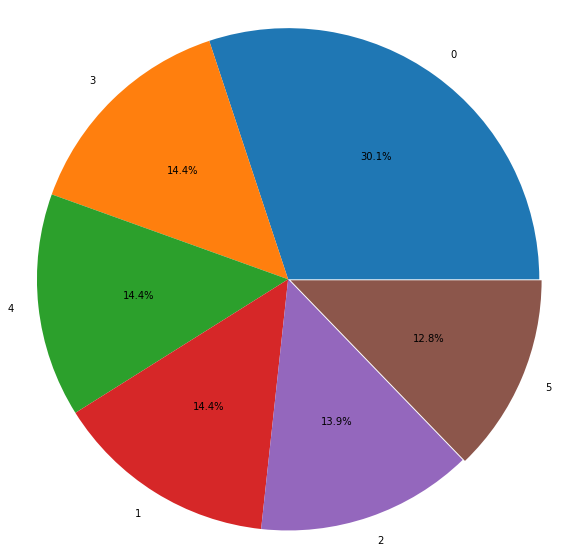

In [ ]:
# Check the number of unique values in the label column
label_count = df_class['Target'].value_counts()
print(label_count.index)
print(label_count)

# Draw a pie chart with the values above
plt.figure(figsize=(10, 10))
plt.pie(label_count, labels=label_count.index,
        explode = [0, 0, 0, 0, 0, 0.01],
        autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [ ]:
df_class['Target'].unique()

array([1, 3, 5, 2, 4, 0], dtype=int8)

### Exploratory data analysis

In [ ]:
df_class[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']].describe()

Ia           Ib           Ic           Va           Vb  \
count  7861.000000  7861.000000  7861.000000  7861.000000  7861.000000   
mean     13.721194   -44.845268    34.392394    -0.007667     0.001152   
std     464.741671   439.269195   371.107412     0.289150     0.313437   
min    -883.542316  -900.526951  -883.357762    -0.620748    -0.608016   
25%    -119.802518  -271.845947   -61.034219    -0.130287    -0.159507   
50%       2.042805     5.513317    -4.326711    -0.005290     0.001620   
75%     227.246377    91.194282    49.115141     0.111627     0.153507   
max     885.738571   889.868884   901.274261     0.595342     0.627875   

                Vc  
count  7861.000000  
mean      0.006515  
std       0.307897  
min      -0.612709  
25%      -0.215977  
50%       0.009281  
75%       0.239973  
max       0.600179

### Boxplots for quantitative analysis

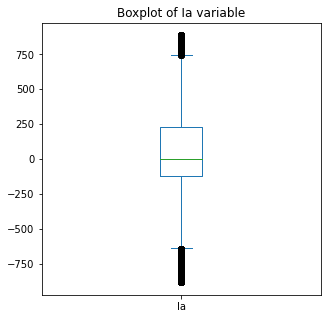

In [ ]:
df_class['Ia'].plot(kind='box', title='Boxplot of Ia variable', figsize=(5,5))

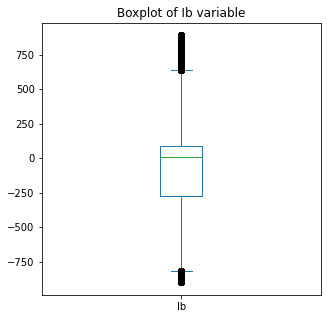

In [ ]:
df_class['Ib'].plot(kind='box', title='Boxplot of Ib variable', figsize=(5,5))

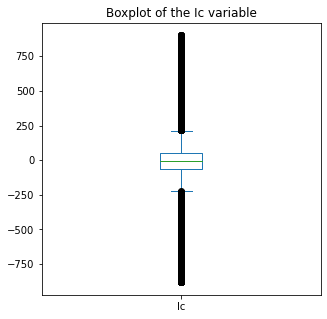

In [ ]:
df_class['Ic'].plot(kind='box', title='Boxplot of the Ic variable', figsize=(5,5))

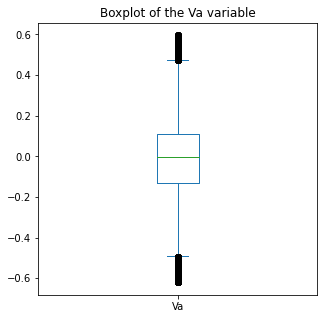

In [ ]:
df_class['Va'].plot(kind='box', title='Boxplot of the Va variable', figsize=(5,5))

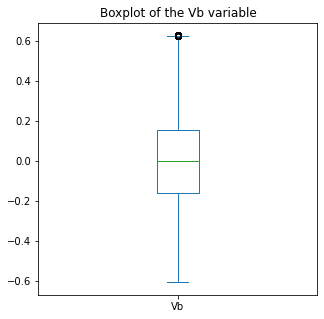

In [ ]:
df_class['Vb'].plot(kind='box', title='Boxplot of the Vb variable', figsize=(5,5))

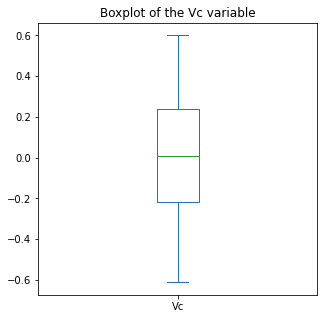

In [ ]:
df_class['Vc'].plot(kind='box', title='Boxplot of the Vc variable', figsize=(5,5))

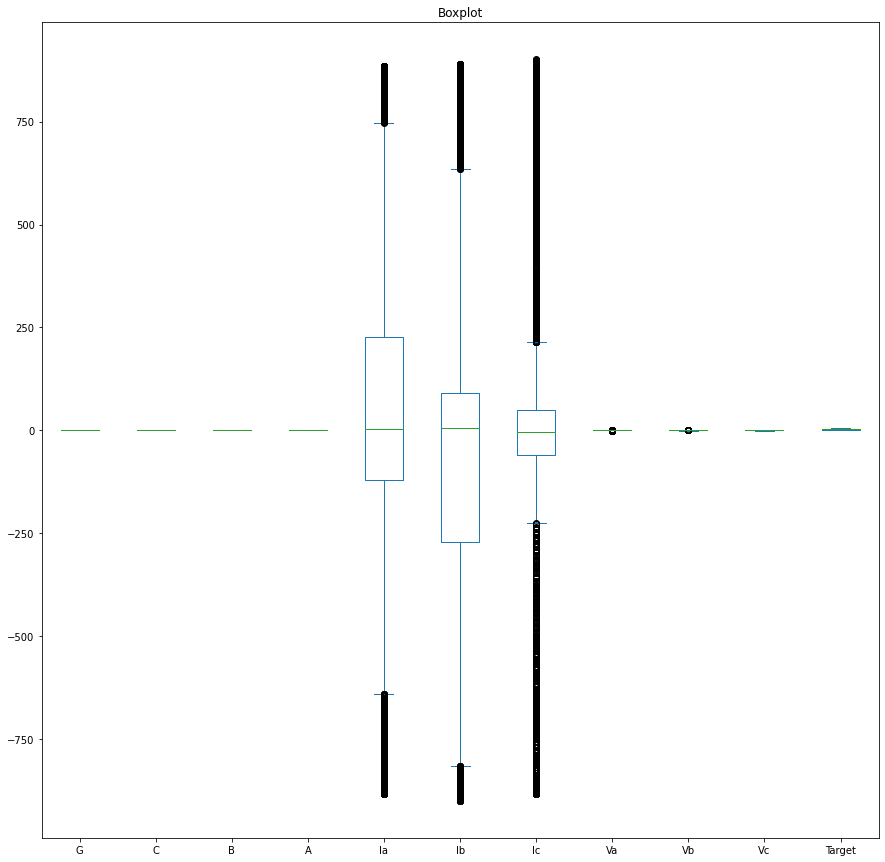

In [ ]:
df_class.plot(kind='box', title='Boxplot', figsize=(15,15))

### Plot Histogram of each variable

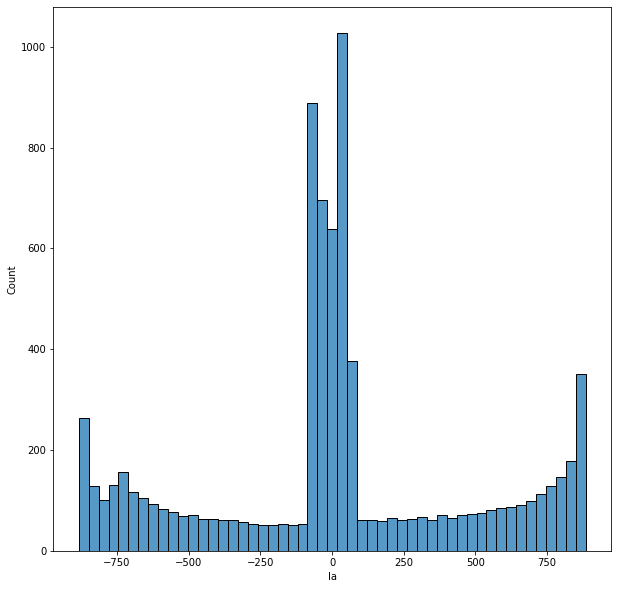

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.histplot(df_class['Ia'])

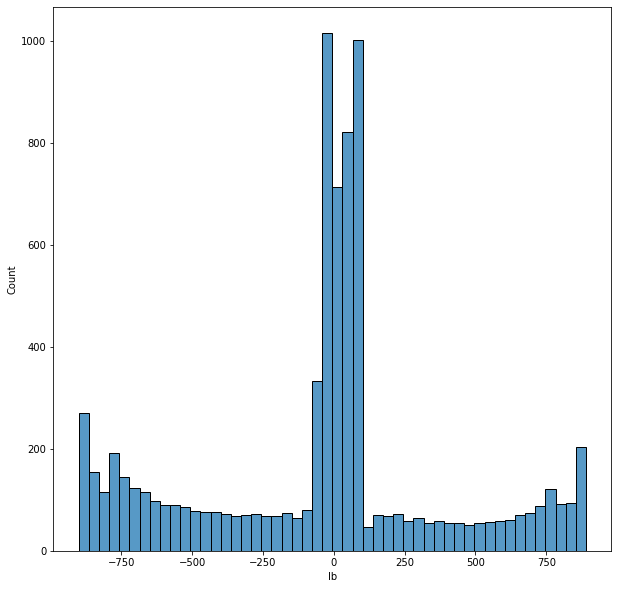

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.histplot(df_class['Ib'])

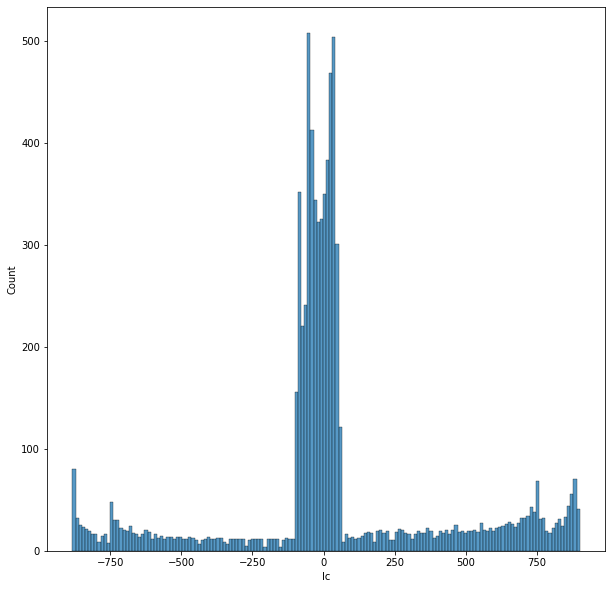

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.histplot(df_class['Ic'])

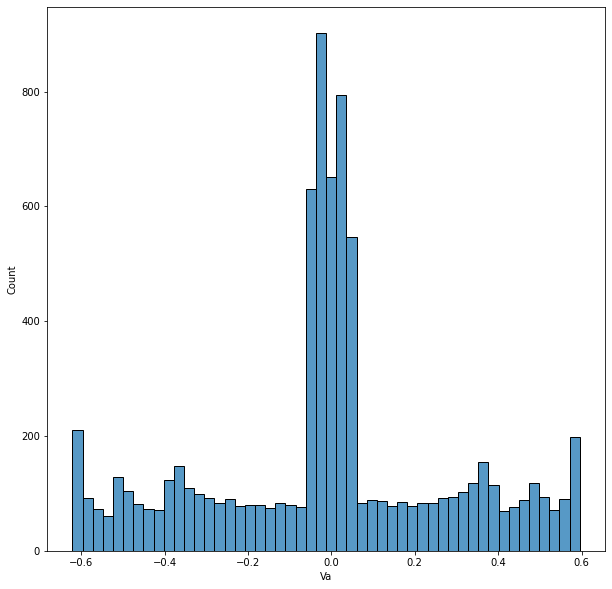

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.histplot(df_class['Va'])

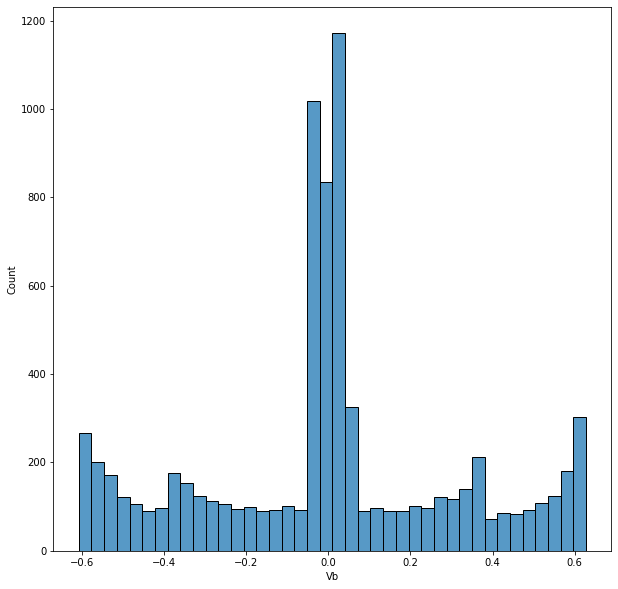

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.histplot(df_class['Vb'])

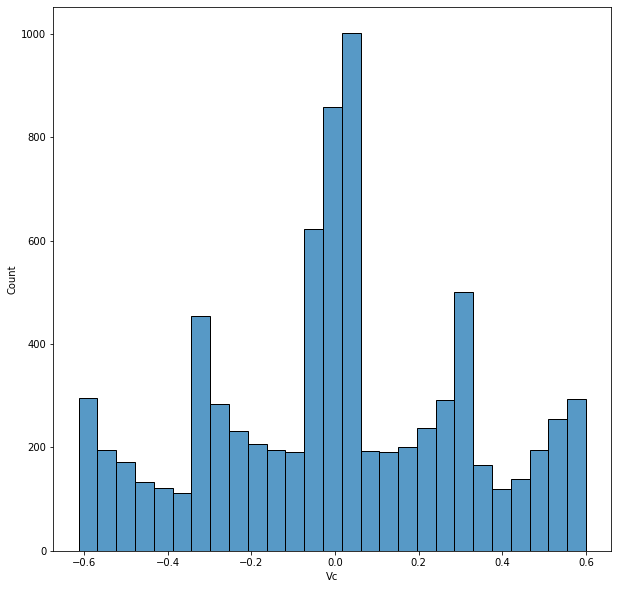

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.histplot(df_class['Vc'])

### Plot Histogram of each variable with respect to the Target Variable using FacetPlot

Create a histogram showing the distubution in relation to the different output class (0 & 1)

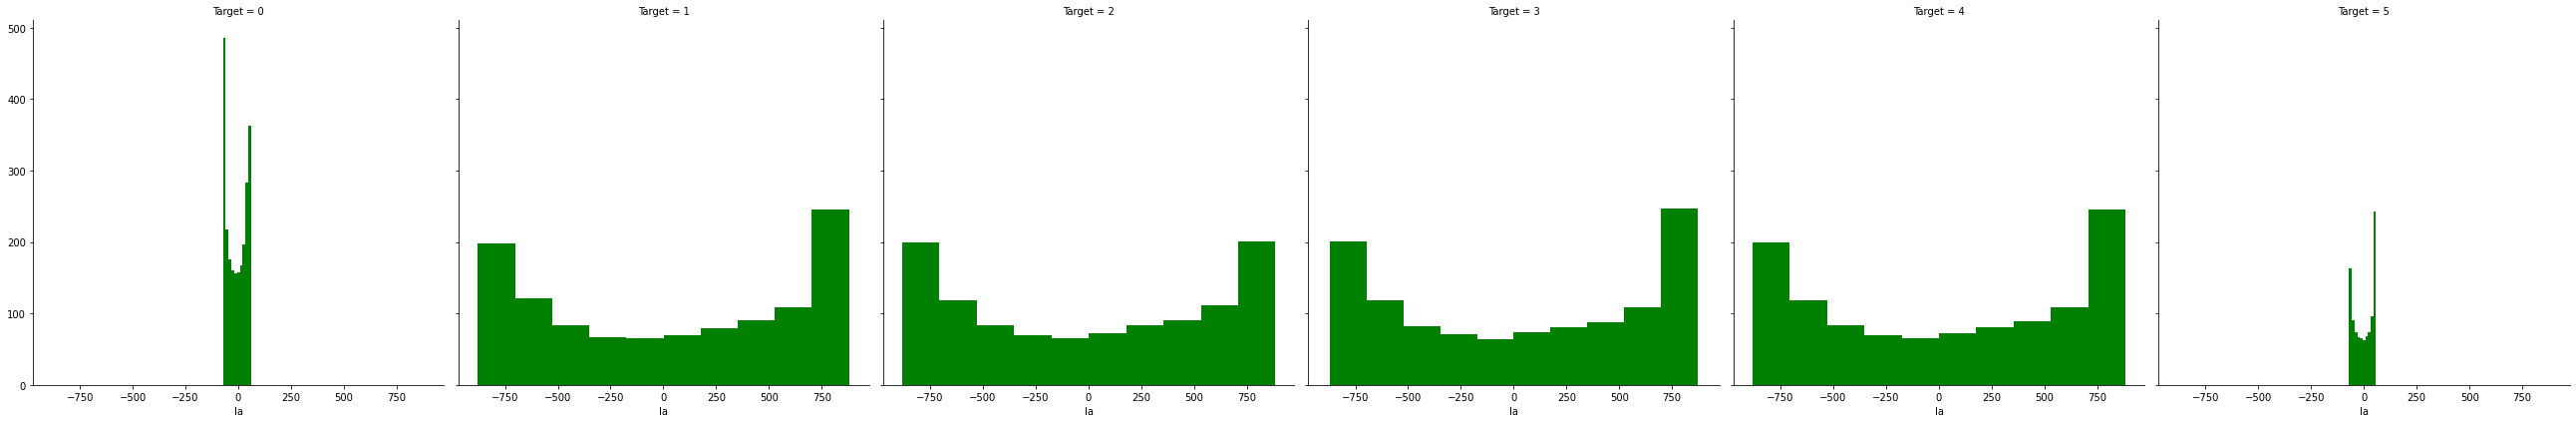

In [ ]:
plot = sns.FacetGrid(df_class,
                     col='Target',
                     height=6,
                     margin_titles=True)
plot.map(plt.hist, 'Ia',
         color='green')

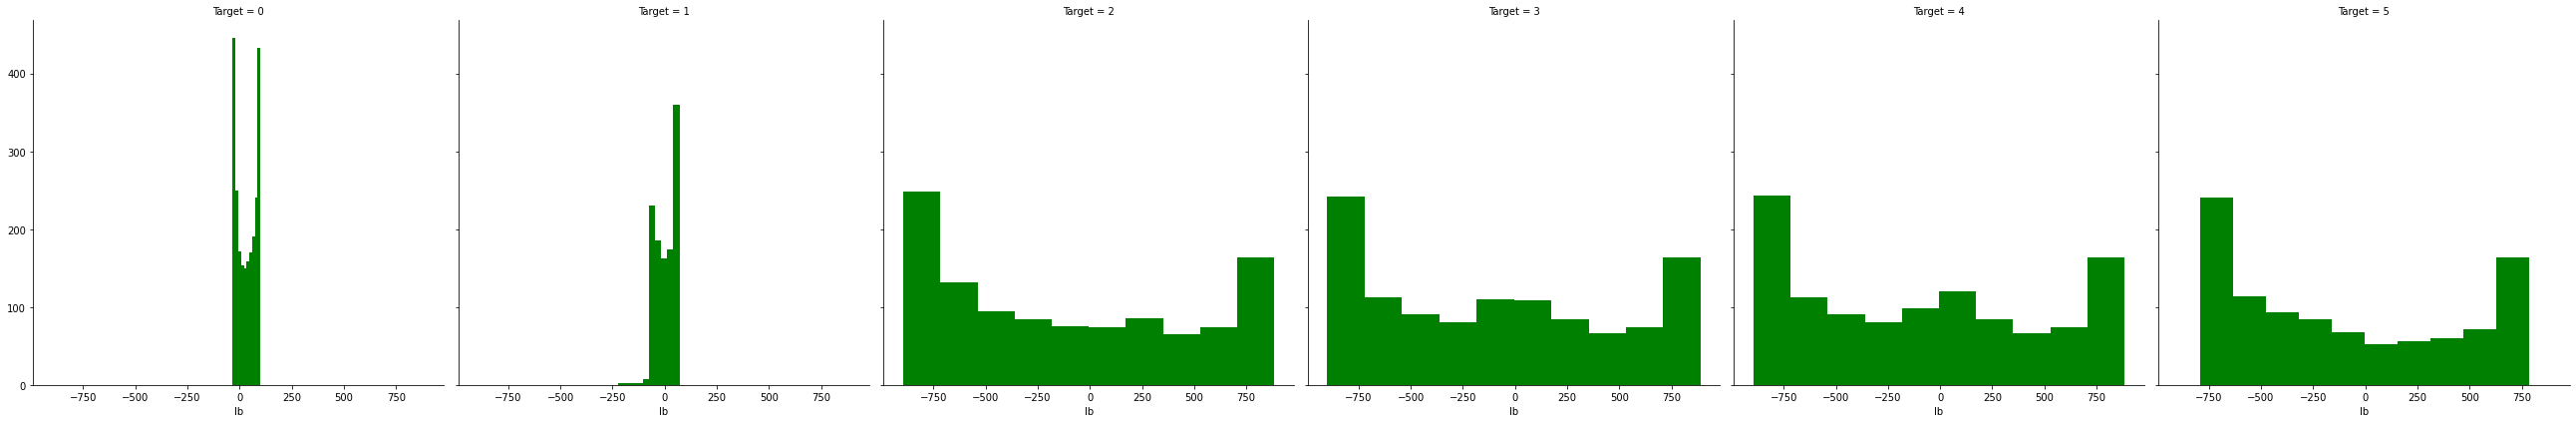

In [ ]:
plot = sns.FacetGrid(df_class,
                     col='Target',
                     height=6,
                     margin_titles=True)
plot.map(plt.hist, 'Ib',
         color='green')

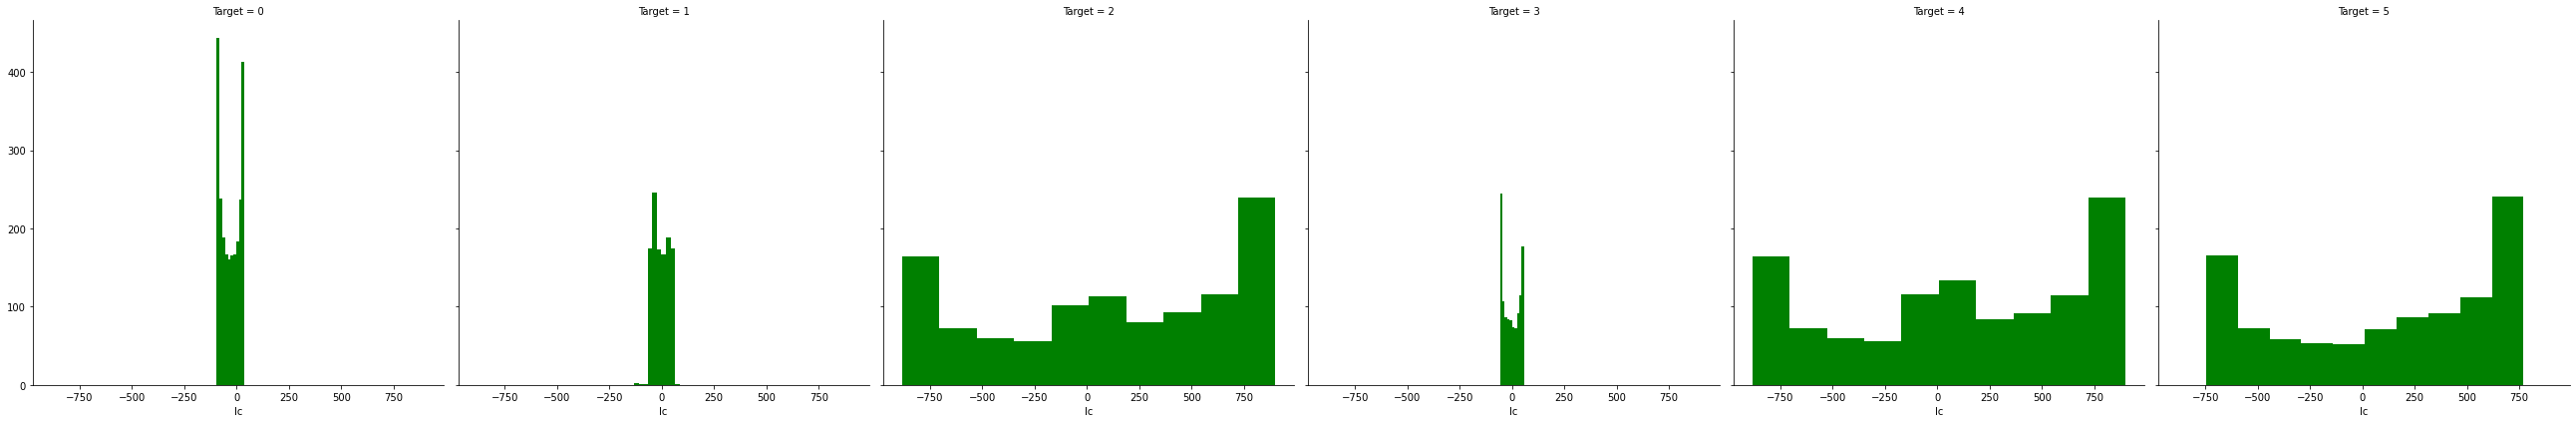

In [ ]:
plot = sns.FacetGrid(df_class,
                     col='Target',
                     height=6,
                     margin_titles=True)
plot.map(plt.hist, 'Ic',
         color='green')

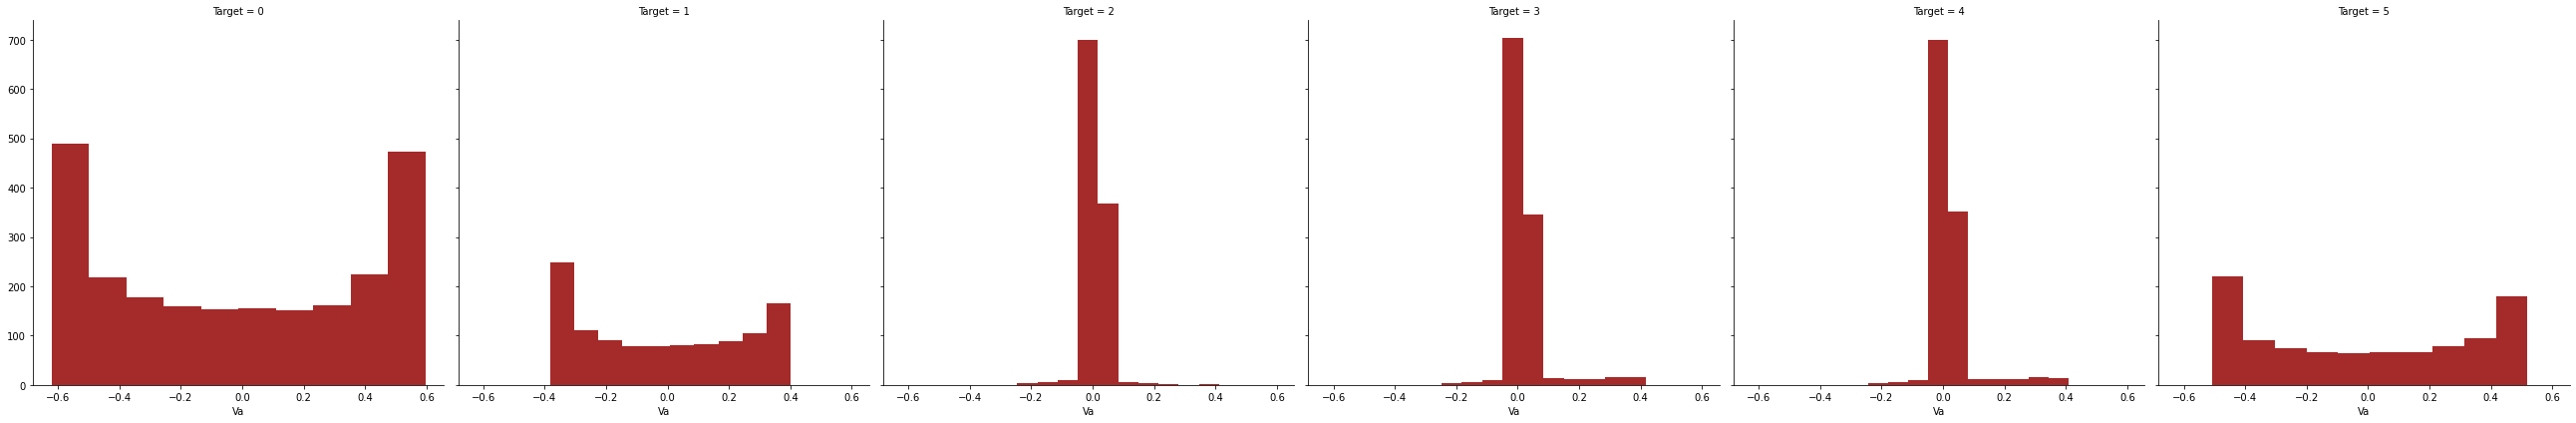

In [ ]:
plot = sns.FacetGrid(df_class,
                     col='Target',
                     height=6,
                     margin_titles=True)
plot.map(plt.hist, 'Va',
         color='brown')

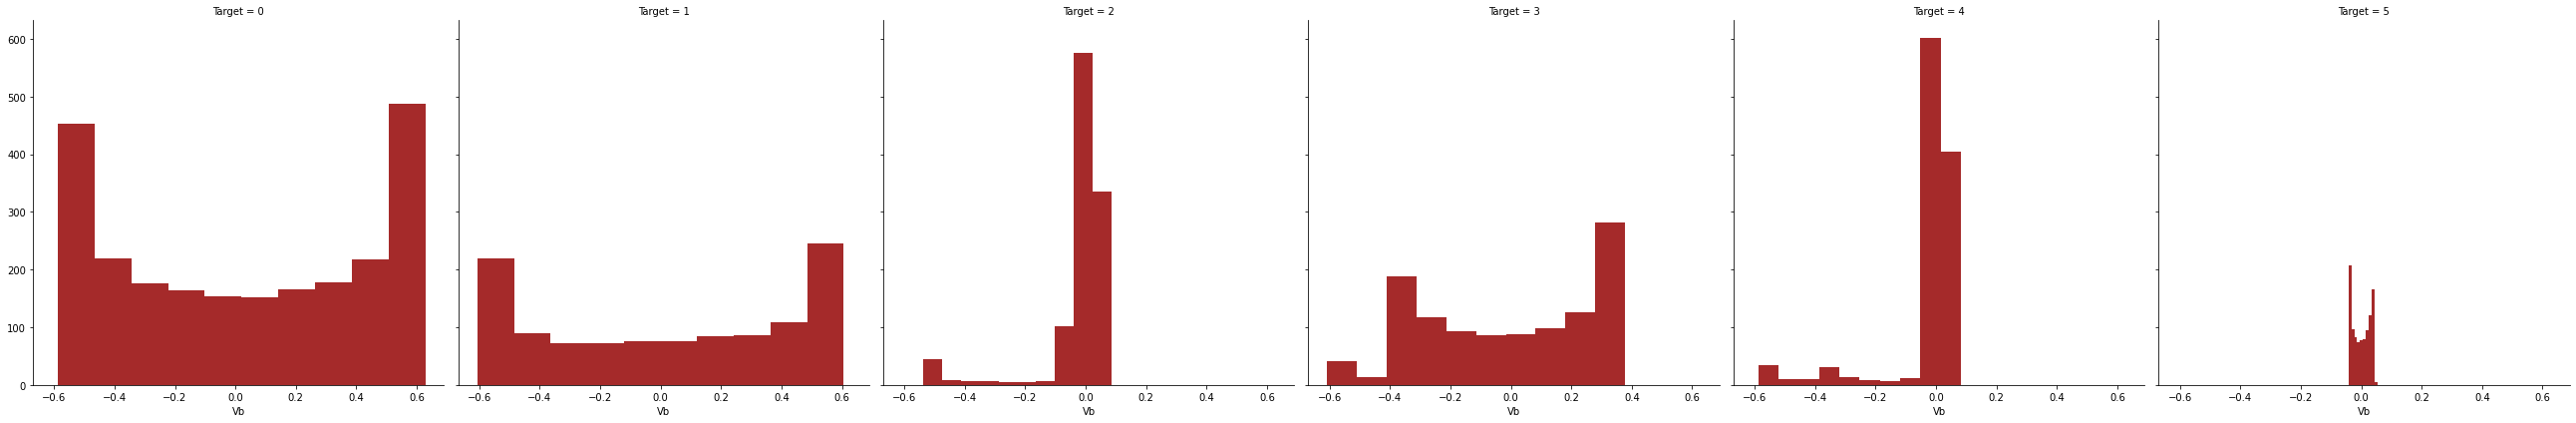

In [ ]:
plot = sns.FacetGrid(df_class,
                     col='Target',
                     height=6,
                     margin_titles=True)
plot.map(plt.hist, 'Vb',
         color='brown')

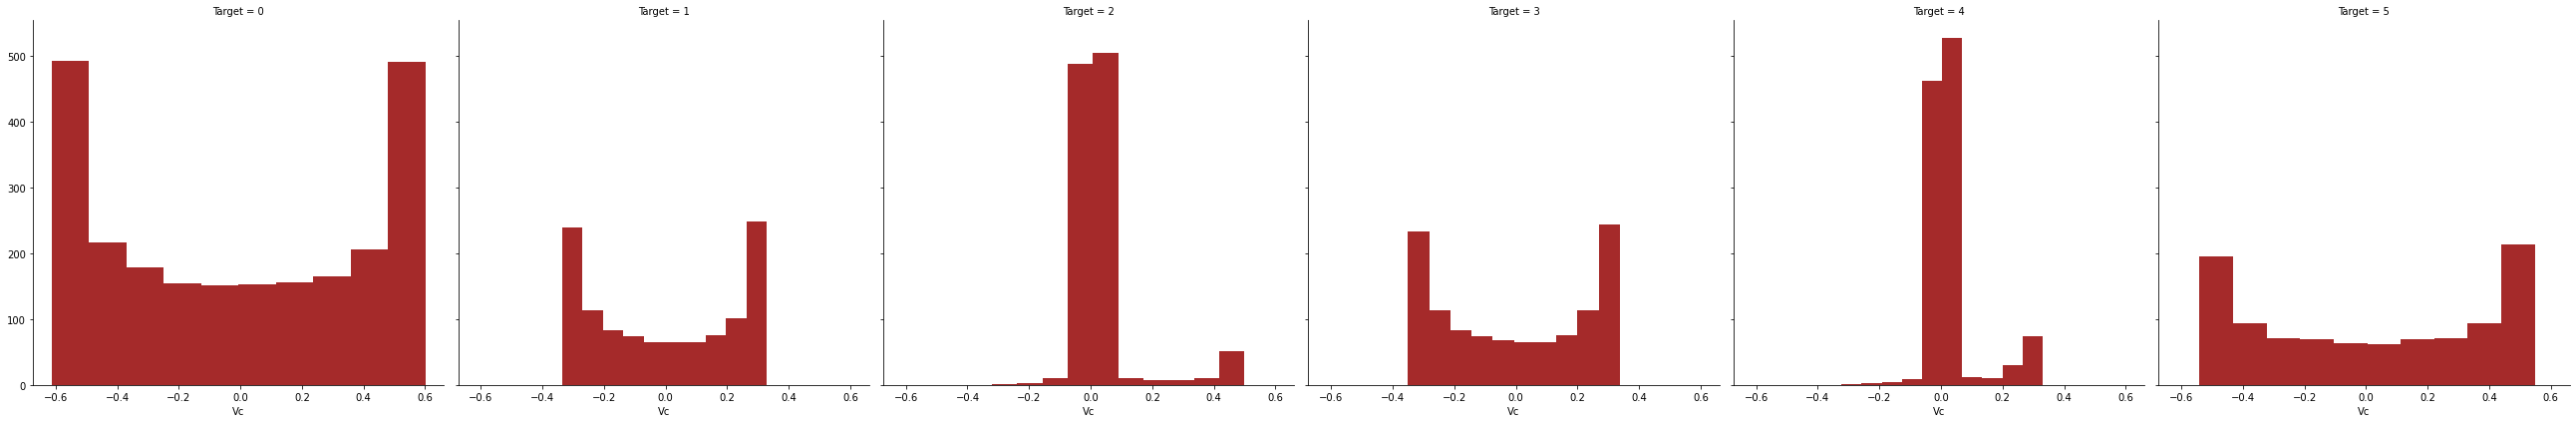

In [ ]:
plot = sns.FacetGrid(df_class,
                     col='Target',
                     height=6,
                     margin_titles=True)
plot.map(plt.hist, 'Vc',
         color='brown')

Plot heatmap to show correlation between variables

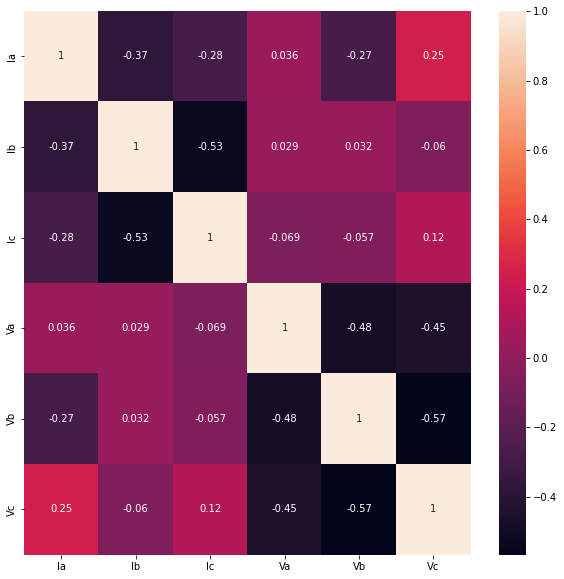

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_class[df_class.columns.difference(['Target', 'G', 'A', 'B', 'C'])].corr(), 
            annot=True,
            ax=ax)

Pairplot

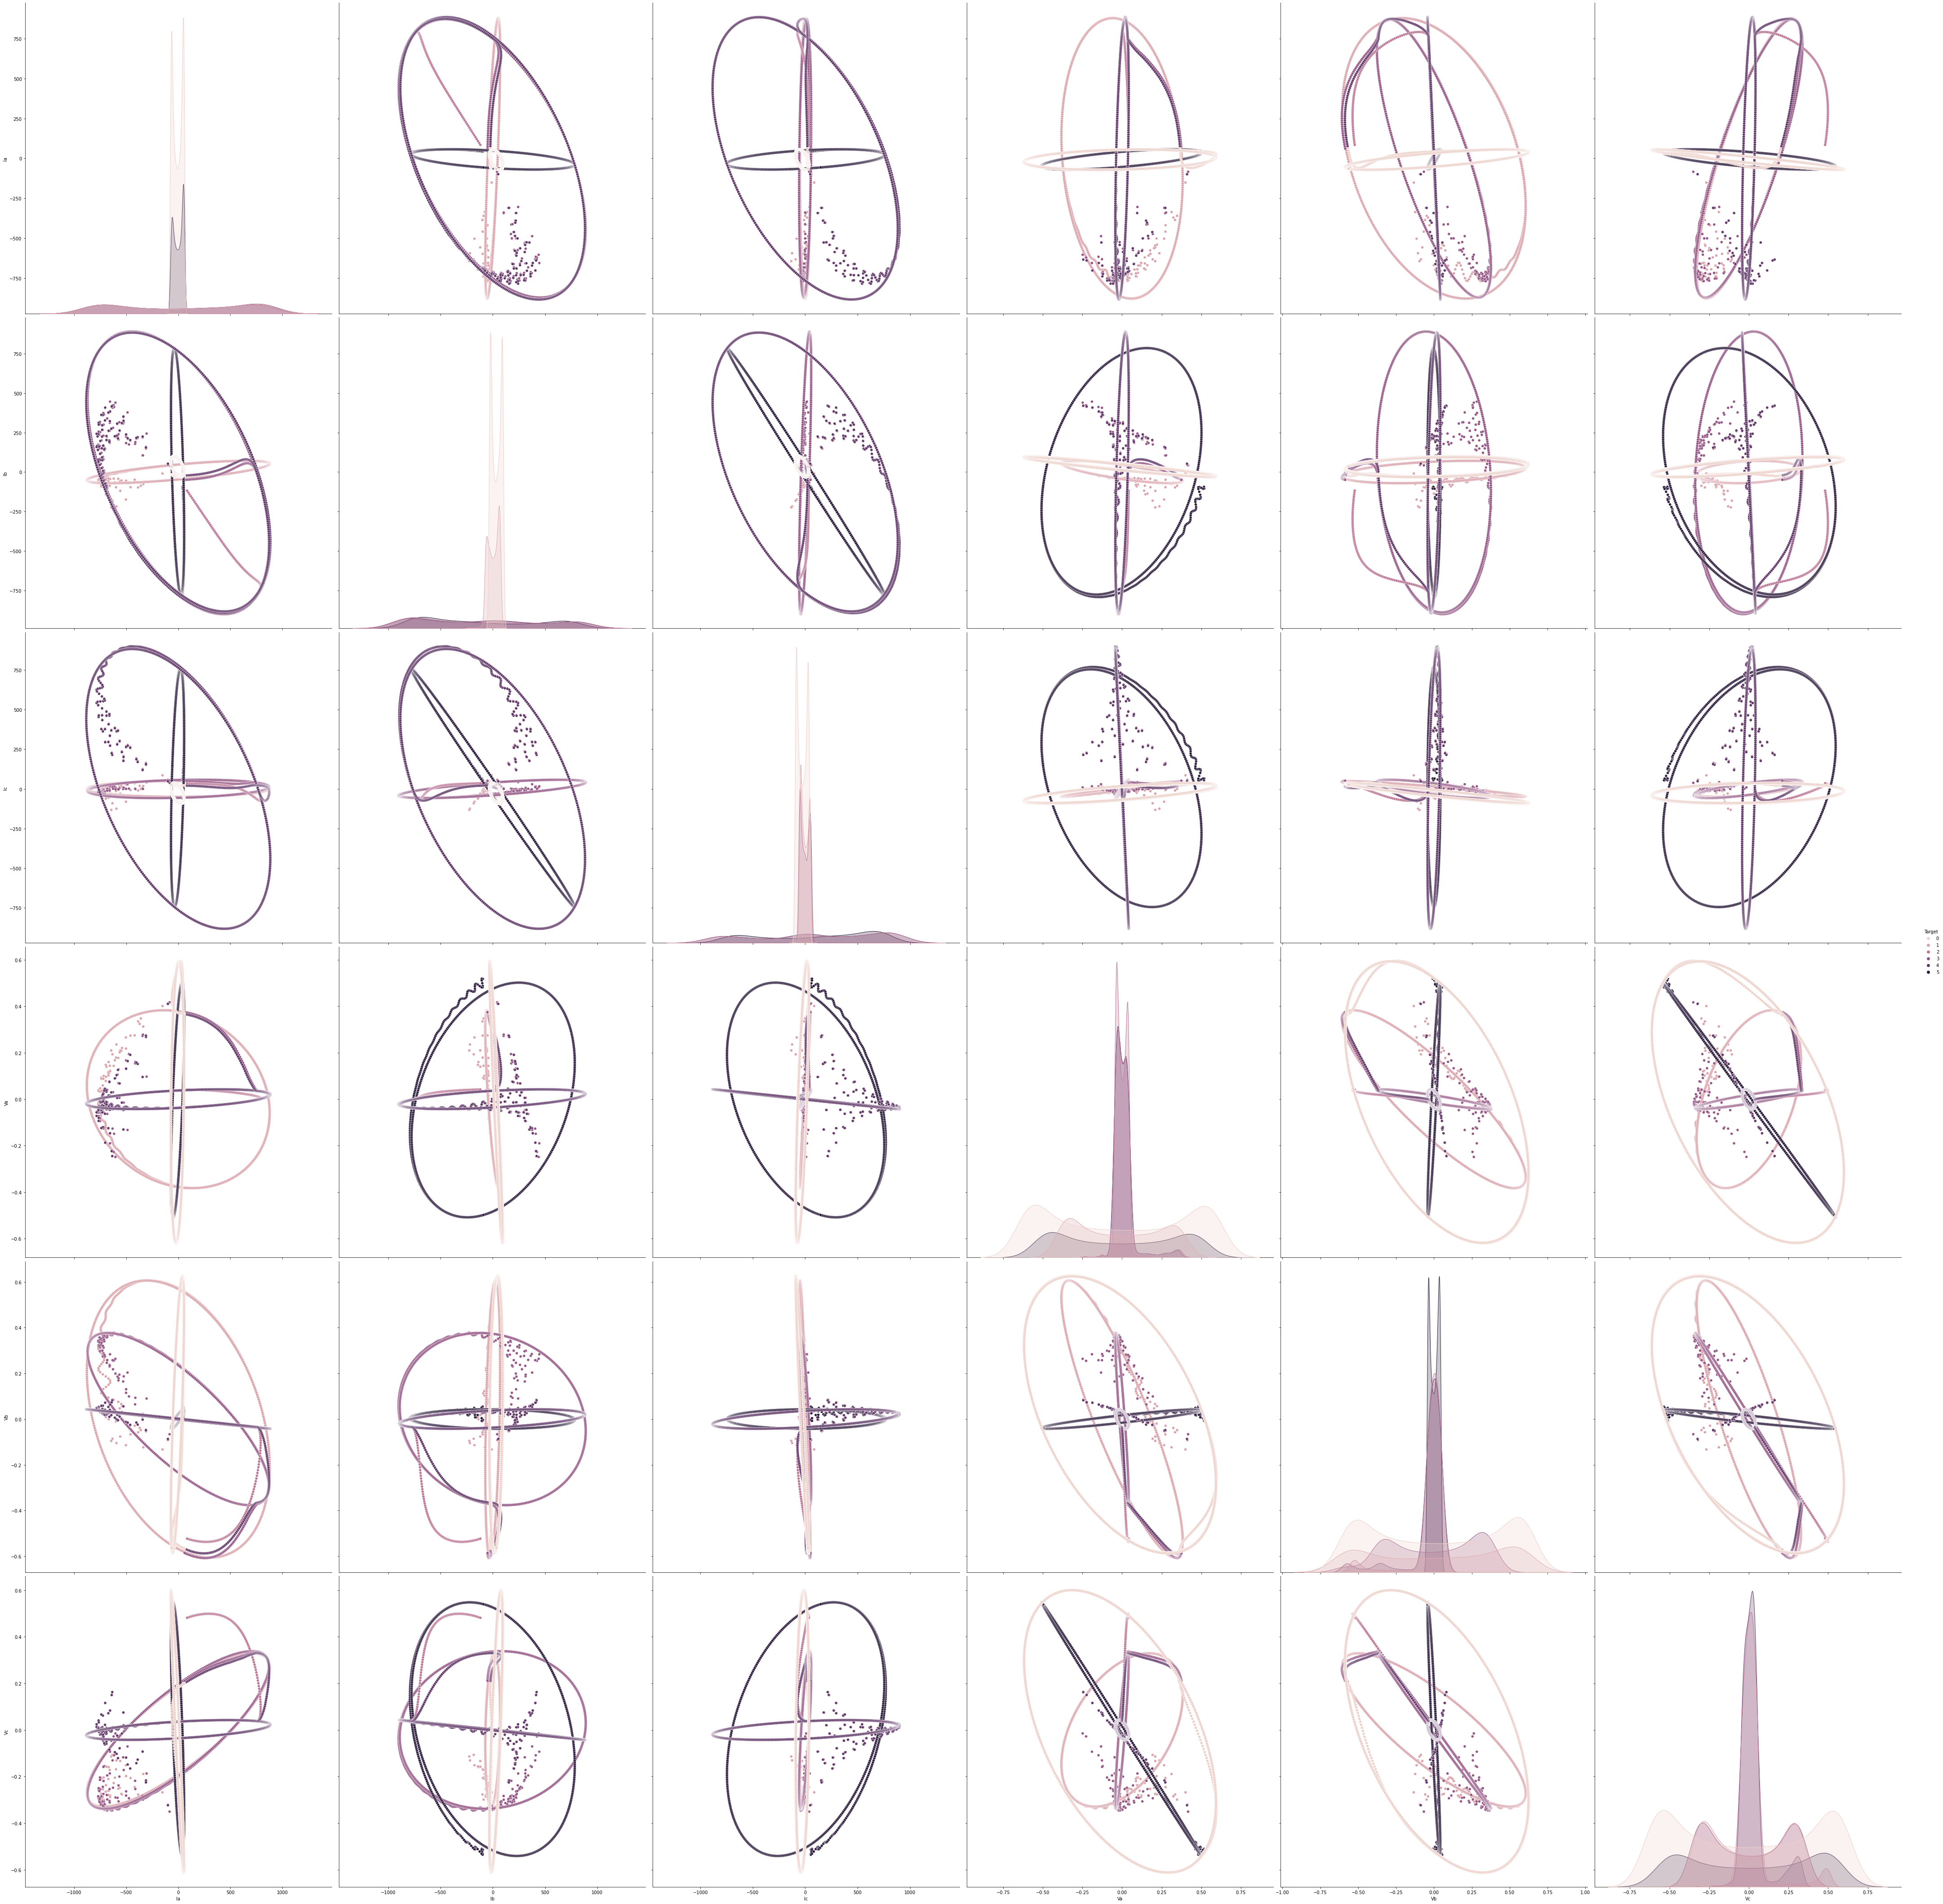

In [ ]:
sns.pairplot(df_class[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc', 'Target']], hue='Target', height=10)

### Separate the features and labels

In [ ]:
# features
from keras.utils import np_utils

X = df_class.iloc[:, 4:-1].values

# labels
y = df_class['Target'].values
# one hot encode the target variable
encoded_y = np_utils.to_categorical(y)

print("The features of the dataset", X, sep='\n', end='\n\n')
print("The target variable of the dataset", encoded_y, sep='\n')

The features of the dataset
[[-1.51291812e+02 -9.67745156e+00  8.58001623e+01  4.00749853e-01
  -1.32934945e-01 -2.67814907e-01]
 [-3.36186183e+02 -7.62832619e+01  1.83288966e+01  3.12731934e-01
  -1.23633156e-01 -1.89098779e-01]
 [-5.02891583e+02 -1.74648023e+02 -8.09246635e+01  2.65728444e-01
  -1.14300749e-01 -1.51427695e-01]
 ...
 [-6.54466976e+01  3.64720551e+01  2.61065537e+01  1.13106580e-01
  -5.58210927e-01  4.45104348e-01]
 [-6.50296327e+01  3.54770884e+01  2.66847311e+01  1.22404174e-01
  -5.61094199e-01  4.38690025e-01]
 [-6.45984013e+01  3.44807988e+01  2.72500649e+01  1.31668579e-01
  -5.63834635e-01  4.32166056e-01]]

The target variable of the dataset
[[0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


### Split dataset into training and test set

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, encoded_y,
                                                    test_size=0.2,
                                                    stratify=encoded_y,
                                                    random_state=22)

# Apply feature scaling
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
print("Scaled Matrix of features (Training set)",scaled_X_train, sep='\n', end='\n\n')
print("Scaled Matrix of features (Testing set)", scaled_X_test, sep='\n', end='\n\n')
print("Number of records in the training set: ", len(scaled_X_train))
print("Number of records in the test set: ", len(scaled_X_test))

Scaled Matrix of features (Training set)
[[-0.70716491  0.15033187 -0.21436171 -1.09434717  1.92282512 -0.93384074]
 [ 1.04699615 -1.90963098  0.93795139 -0.04389989 -0.07738159  0.1201175 ]
 [ 1.75543521  0.24614856 -0.12870752 -0.60276869 -0.03375296  0.60014905]
 ...
 [-1.75005485  0.34736669 -0.18211774 -0.08945446  1.15308803 -1.09198621]
 [ 0.21955166  0.21898274 -0.22146195 -1.29708537  1.71574548 -0.53237712]
 [ 0.08625958 -0.26627566  0.20404366  1.51903177  0.12789547 -1.55611401]]

Scaled Matrix of features (Testing set)
[[-0.16175621  1.64514414 -1.74280712 -0.34429373 -0.08240445  0.40717382]
 [-0.07053733 -1.21707585  1.52061415 -1.50524364 -0.08792227  1.50240768]
 [-0.18262202  0.22530168 -0.05696498 -0.08164458 -1.58475991  1.69279886]
 ...
 [ 1.49768014  0.2004985   0.02087441  0.26739695 -1.28819253  1.06276114]
 [-0.12351165  1.87651646 -2.06333688  0.39188624 -0.02987366 -0.33733807]
 [-0.16986671  0.37178906 -0.23042574 -1.54664738 -0.1404758   1.59486225]]

Numbe

### Neural Network

In [ ]:
import tensorflow as tf

# Initializing the ANN
model = tf.keras.models.Sequential()

# Add the first hidden layer
model.add(tf.keras.layers.Dense(units=12,
                                activation='relu',
                                input_shape=scaled_X_train[0].shape))

# Add the second hidden layer
model.add(tf.keras.layers.Dense(units=8,
                                activation='relu'))

# Add the output layer
model.add(tf.keras.layers.Dense(units=6,
                                activation='softmax'))

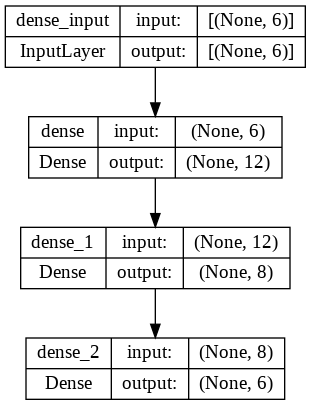

In [ ]:
# Plot model architecture
tf.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True)

In [ ]:
# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

history = model.fit(scaled_X_train, y_train, batch_size=32, epochs=400)

Epoch 1/400
197/197 [==============================] - 2s 2ms/step - loss: 1.6983 - accuracy: 0.3096 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/400
197/197 [==============================] - 0s 2ms/step - loss: 1.3562 - accuracy: 0.5216 - precision: 0.8171 - recall: 0.0945
Epoch 3/400
197/197 [==============================] - 0s 2ms/step - loss: 1.0607 - accuracy: 0.6080 - precision: 0.8093 - recall: 0.2761
Epoch 4/400
197/197 [==============================] - 0s 2ms/step - loss: 0.8557 - accuracy: 0.6865 - precision: 0.8310 - recall: 0.4292
Epoch 5/400
197/197 [==============================] - 0s 2ms/step - loss: 0.7255 - accuracy: 0.7226 - precision: 0.8292 - recall: 0.5318
Epoch 6/400
197/197 [==============================] - 0s 2ms/step - loss: 0.6390 - accuracy: 0.7368 - precision: 0.8253 - recall: 0.5980
Epoch 7/400
197/197 [==============================] - 0s 2ms/step - loss: 0.5738 - accuracy: 0.7503 - precision: 0.8337 - recall: 0.6465
Epoch 8/400
197/197 [=====

In [ ]:
# make predictions
y_pred = model.predict(scaled_X_test)
# set threshold to convert from probability to true or false
y_pred = (y_pred > 0.5)
print(y_pred)
# reshape to 1-D and convert boolean to integer
# y_pred = y_pred.reshape(1,-1)[0].astype(int)
pd.DataFrame(list(zip(y_test.argmax(axis=1), y_pred.argmax(axis=1))), columns=["Actual", "Predicted"])

50/50 [==============================] - 0s 2ms/step
[[False False False False False  True]
 [False False False False False  True]
 [ True False False False False False]
 ...
 [False False False  True False False]
 [False False False False False  True]
 [False False False False False  True]]


Actual  Predicted
0          5          5
1          5          5
2          0          0
3          0          0
4          1          1
...      ...        ...
1568       0          0
1569       0          0
1570       3          3
1571       5          5
1572       5          5

[1573 rows x 2 columns]

### Evaluate Model

{'accuracy_score': 0.863318499682136, 'precision_score': 0.84292696121245, 'recall_score': 0.8376648629801728, 'f1_score': 0.8237794612533182}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       473
           1       0.97      1.00      0.98       226
           2       0.57      0.24      0.33       219
           3       1.00      0.97      0.98       227
           4       0.53      0.82      0.64       227
           5       1.00      1.00      1.00       201

    accuracy                           0.86      1573
   macro avg       0.84      0.84      0.82      1573
weighted avg       0.87      0.86      0.85      1573



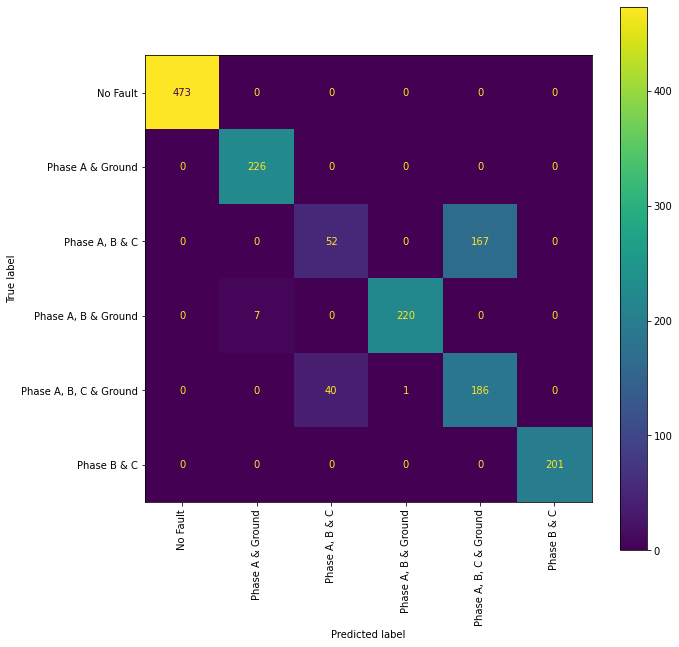

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

def evaluate_model(y_val, y_pred):
  """Function to evaluate model and return the metric of the model
  
  It returns a dictionary with the classification metrics.
  """
  accuracy = accuracy_score(y_val, y_pred)
  precision = precision_score(y_val, y_pred, average='macro')
  recall = recall_score(y_val, y_pred, average='macro')
  f1 = f1_score(y_val, y_pred, average='macro')
  result = {"accuracy_score": accuracy,
            "precision_score": precision,
            "recall_score": recall,
            "f1_score": f1}
  return result

def plot_confusion_matrix(y_val, y_pred, label):
  '''function to plot confusion matrix

  Args
  y_val: array. The validation set of the target variable.
  y_pred: array. Model's prediction.
  label: list. A list containing all the classes in the target variable

  Returns
  It returns a plot of the confusion matrix
  '''
  cm = confusion_matrix(y_val, y_pred)
  fig, ax = plt.subplots(figsize=(10,10))
  ax.grid(False)
  ConfusionMatrixDisplay(cm, display_labels=label).plot(ax=ax, values_format='',
                                                        xticks_rotation ='vertical')

# define class labels
label = ['No Fault', 'Phase A & Ground', 'Phase A, B & C',
         'Phase A, B & Ground', 'Phase A, B, C & Ground', 'Phase B & C']

# Get test result
test_result = evaluate_model(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(test_result)

# Plot confusion matrix
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
plot_confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), label)

(0.0, 1.0)

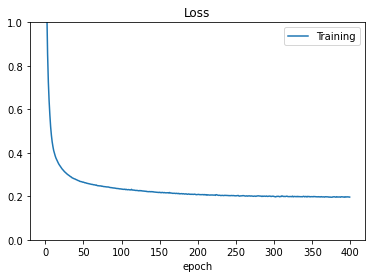

In [ ]:
# Plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.legend(['Training'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylim(0, 1)

Text(0.5, 0, 'epoch')

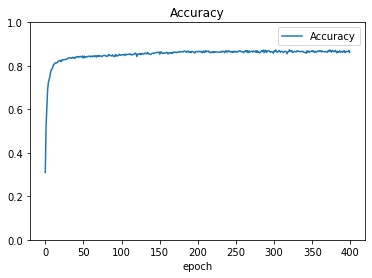

In [ ]:
# Plot graph between training and validation accuracy
plt.plot(history.history['accuracy'])
plt.legend(['Accuracy'])
plt.ylim(0, 1)
plt.title('Accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

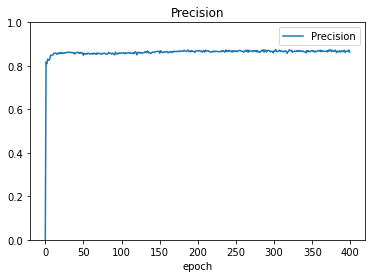

In [ ]:
# Plot graph between training and validation accuracy
plt.plot(history.history['precision'])
plt.legend(['Precision'])
plt.title('Precision')
plt.ylim(0, 1)
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

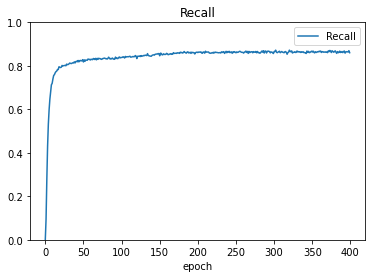

In [ ]:
# Plot graph between training and validation accuracy
plt.plot(history.history['recall'])
plt.legend(['Recall'])
plt.title('Recall')
plt.ylim(0, 1)
plt.xlabel('epoch')

### Train ML models

Training Accuracy score 0.9693066157760815
Training Precision score 0.9727231957366498
Training Recall score 0.9637899147166746
Training F1-score 0.9680148045816175
Validation Accuracy score 0.866497139224412
Validation Precision score 0.8475200032193037
Validation Recall score 0.8428168808584396
Validation F1-score 0.8450234821398506
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       473
           1       1.00      0.99      0.99       226
           2       0.55      0.51      0.53       219
           3       0.99      1.00      0.99       227
           4       0.55      0.57      0.56       227
           5       1.00      1.00      1.00       201

    accuracy                           0.87      1573
   macro avg       0.84      0.84      0.84      1573
weighted avg       0.86      0.87      0.86      1573



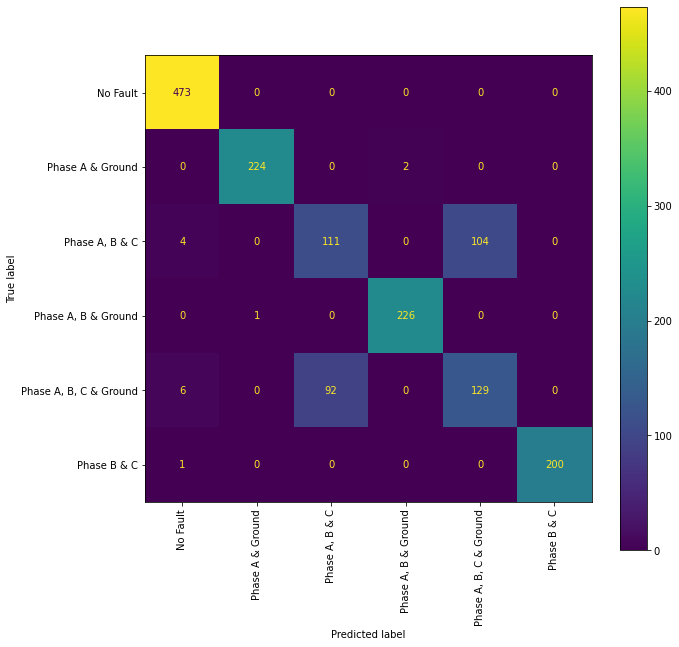

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',
                            min_samples_split=20,
                            # max_depth=10,
                            random_state=22)
dt.fit(scaled_X_train, y_train)

y_pred = dt.predict(scaled_X_test)
y_train_pred = dt.predict(scaled_X_train)

average = 'macro'
print("Training Accuracy score", accuracy_score(y_train, y_train_pred))
print("Training Precision score", precision_score(y_train, y_train_pred, average=average))
print("Training Recall score", recall_score(y_train, y_train_pred, average=average))
print("Training F1-score", f1_score(y_train, y_train_pred, average=average))

print("Validation Accuracy score", accuracy_score(y_test, y_pred))
print("Validation Precision score", precision_score(y_test, y_pred, average=average))
print("Validation Recall score", recall_score(y_test, y_pred, average=average))
print("Validation F1-score", f1_score(y_test, y_pred, average=average))

# Plot confusion matrix
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
plot_confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), label)

In [ ]:
# from sklearn.model_selection import GridSearchCV

# decision_tree_model_2 = DecisionTreeClassifier()

# # setting different parameter combinations
# parameters = [{'min_samples_split': [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
#                'criterion':['gini', 'entropy']},
#               ]
# # n_jobs=-1 uses all the system's processors             
# grid_search = GridSearchCV(estimator=decision_tree_model_2,
#                            param_grid=parameters,
#                            scoring='f1',
#                            cv=10,
#                            n_jobs=-1)

# grid_search.fit(scaled_X_train, y_train)
# # get the best accuracy score
# best_f1 = grid_search.best_score_
# # get the parameters that gave the best score
# best_parameters = grid_search.best_params_
# print("Best f1 {:.2f} %".format(best_f1*100))
# print("Best Parameters:", best_parameters)

Best f1 nan %
Best Parameters: {'criterion': 'gini', 'min_samples_split': 20}


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
  warnings.warn(


In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

# create data
ann_train_result = [86.18, 86.40, 86.05]
dt_train_result = [96.93, 97.27, 96.38]
ann_val_result = [86.33, 84.29, 83.77]
dt_val_result = [86.65, 84.75, 84.28]
models_list = ["Artificial Neural Network", "Decision Tree"]
metrics = ['Accuracy', 'Precision', 'Recall']


def plot_result(result1, result2, models_list, metrics, title):
  x = np.arange(3)
  width = 0.40
  # plot data in grouped manner of bar type
  plt.figure(figsize=(8,6))
  plt.bar(x-0.2, result1, width)
  plt.bar(x+0.2, result2, width)  

  plt.xticks(x, metrics)
  plt.xlabel("Metrics", fontsize=14)
  plt.ylabel("Scores", fontsize=14)
  plt.title(title, fontsize=16)
  plt.legend(models_list, loc='lower right')
  plt.show()


# invoke function
plot_result(ann_train_result, 
            dt_train_result,
            models_list, metrics, 
            "Training Results For Electric Fault Classification")

In [ ]:
plot_result(ann_val_result, 
            dt_val_result,
            models_list, metrics, 
            "Validation Results For Electric Fault Classification")